In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/group-assignment-ace-2020/train.csv
/kaggle/input/group-assignment-ace-2020/data_description.txt
/kaggle/input/group-assignment-ace-2020/test.csv
/kaggle/input/group-assignment-ace-2020/sample_submission.csv


Importing all the functions (dependencies) that we may need for the algorithm, they will be explained as we use them 

In [2]:
import pandas as pd
import matplotlib as mat
import scipy as sp
import seaborn as sns
import keras
from keras.models import Sequential# as our model
from keras.layers import Dense,Activation, Flatten# define our neural network
from sklearn.model_selection import train_test_split# splitting our dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error# as our loss and metric 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor# estimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [3]:
Train=pd.read_csv('../input/group-assignment-ace-2020/train.csv')# importing our train data set to be used
Test=pd.read_csv('../input/group-assignment-ace-2020/test.csv')# importing our test data set

In [4]:
Train.head()# getting the first 5 records of our dataset  just to see whats there

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
Train.describe()# getting some statistics with with pandas gives 8

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


So here we get some statistics , so here we can tell that our data is positive because we do not have negative stats, but also we note that we have 38 numeric attributes means the rest are categorical or mixed.

In [6]:
Train.columns# find the columns in our data , see how the person was who was inputting the data was thinking

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
Train.shape#so we have 81 columns and 1460 rows in our dataset

(1460, 81)

In [8]:
Train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


- Just to see if we have any NAs or NaN in our dataset so we get rid of them , or substitute them with our mean or median. So here we do have nulls

In [9]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):#if its numerical
        predictors = df.select_dtypes(exclude=['object'])#dont put the objects(only numbers)
    elif (col_type == 'no_num'):#not a number 
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

So in the above function , its for giving us the attributes which are numeric and those which are categorical then at the end get the total which do not have NA or missing data
This will help us when encoding or when doing feature engineering, which attributes need to be encoded. 

In [10]:
num_cols = get_cols_with_no_nans(Train , 'num')
cat_cols = get_cols_with_no_nans(Train , 'no_num')
ALLL=get_cols_with_no_nans(Train , 'all')

In [11]:
print ('Number of numerical columns with no nan values :',len(num_cols))# total of a numericals
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))#total of catagoricals
print ('Number of nun-numerical columns with no nan values :',len(ALLL))# in all columns having no NAs

Number of numerical columns with no nan values : 35
Number of nun-numerical columns with no nan values : 27
Number of nun-numerical columns with no nan values : 62


The above output tells us that we have 35 numerics with no NA and 27 catagoricals with no NAs and in total we will use 62 attributes for our algorithm since we cannot work with NAs 

In [12]:
num_cols# so we know the attributes which are numerics

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [13]:
cat_cols# knowing the categorical attributes so we know which one to encode

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# Visualization
- so here we shall only deal with the numeric attributes in order to see how they are distributed and how are they correlated with each other.

<function matplotlib.pyplot.show(*args, **kw)>

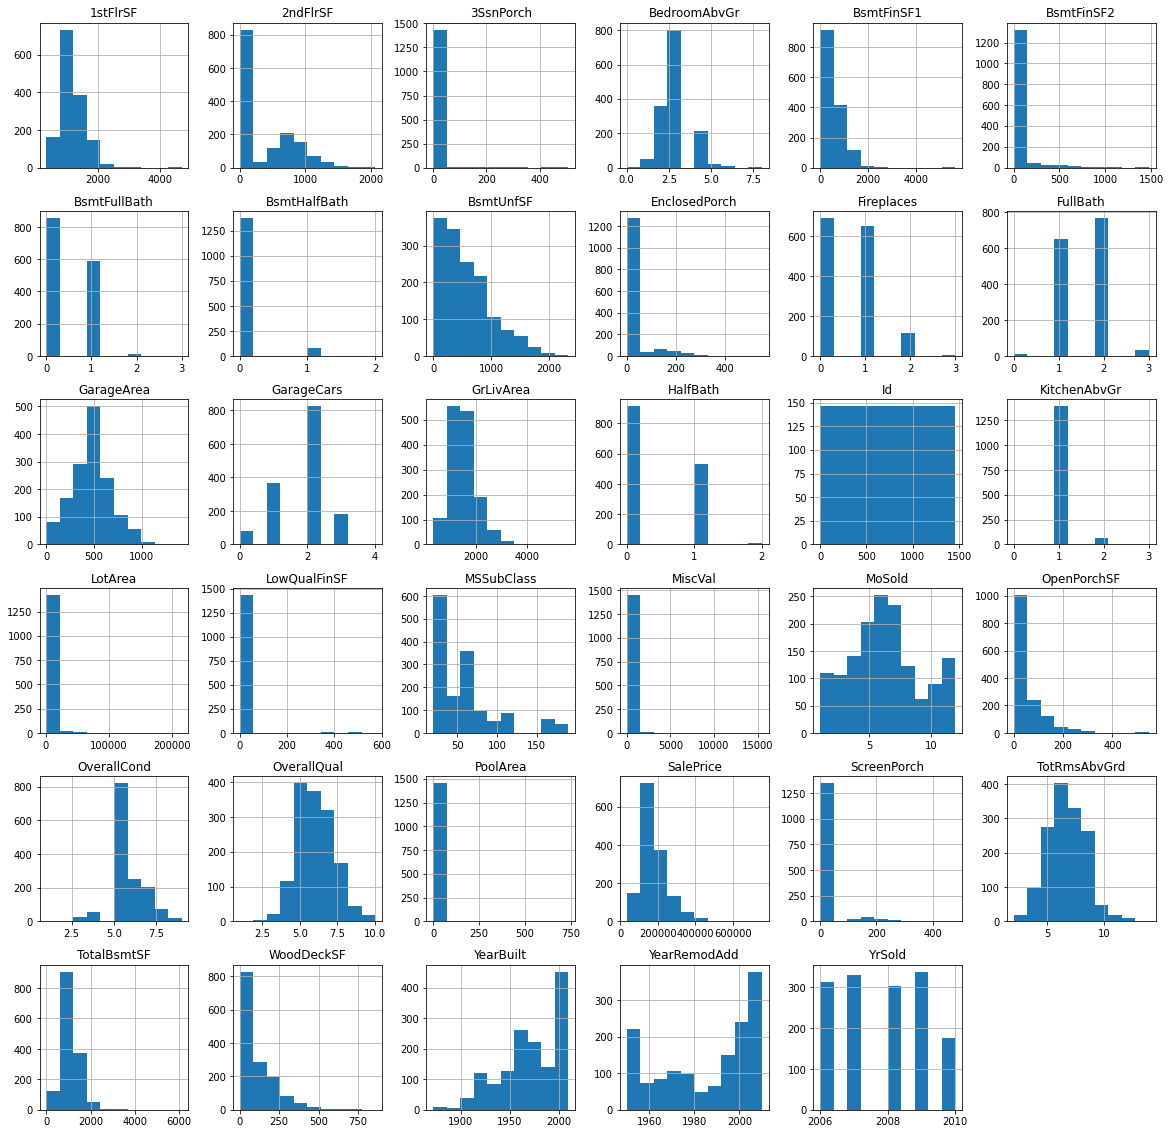

In [14]:
# Univariate(HISTOGRAM)
Numerics=Train[num_cols]
Numerics.hist(figsize=(20,20))
plt.show

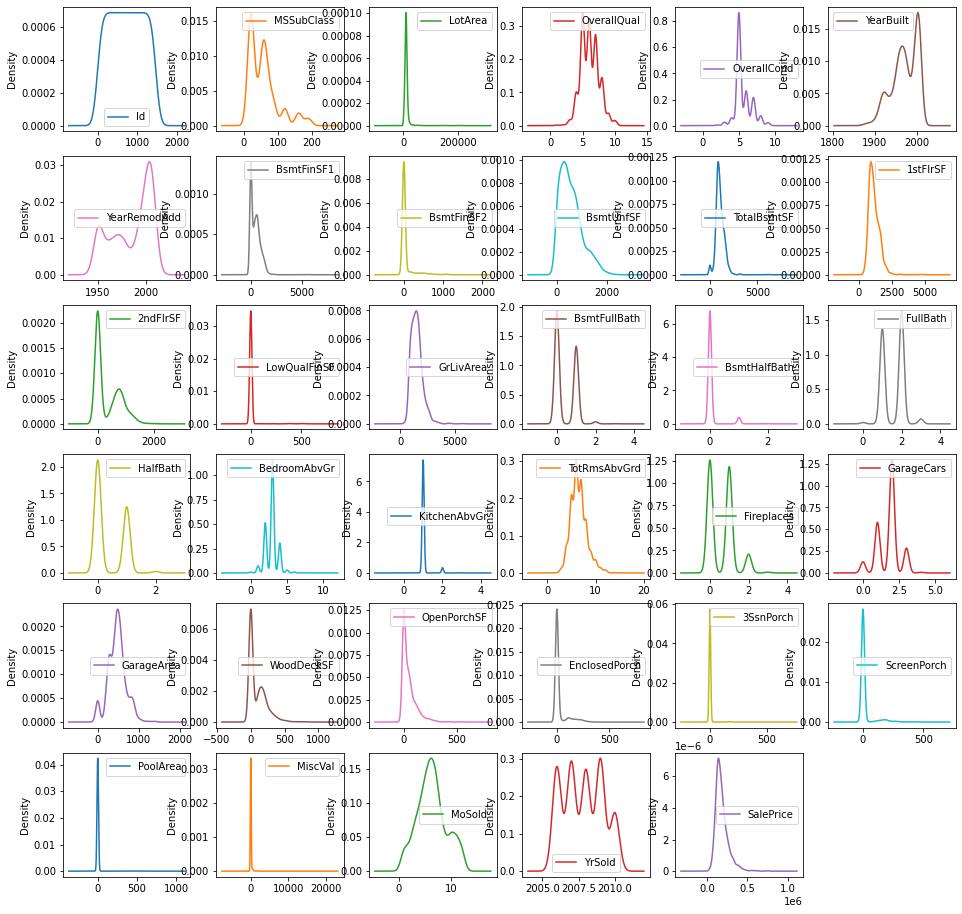

In [15]:
# just to see how they are distributed
Numerics.plot(kind='density',subplots=True, layout=(6,6), sharex=False, sharey=False,figsize=(16,16))
plt.show()# still the presentation of the attributes , some data are not normal distributes and some are normal distributed

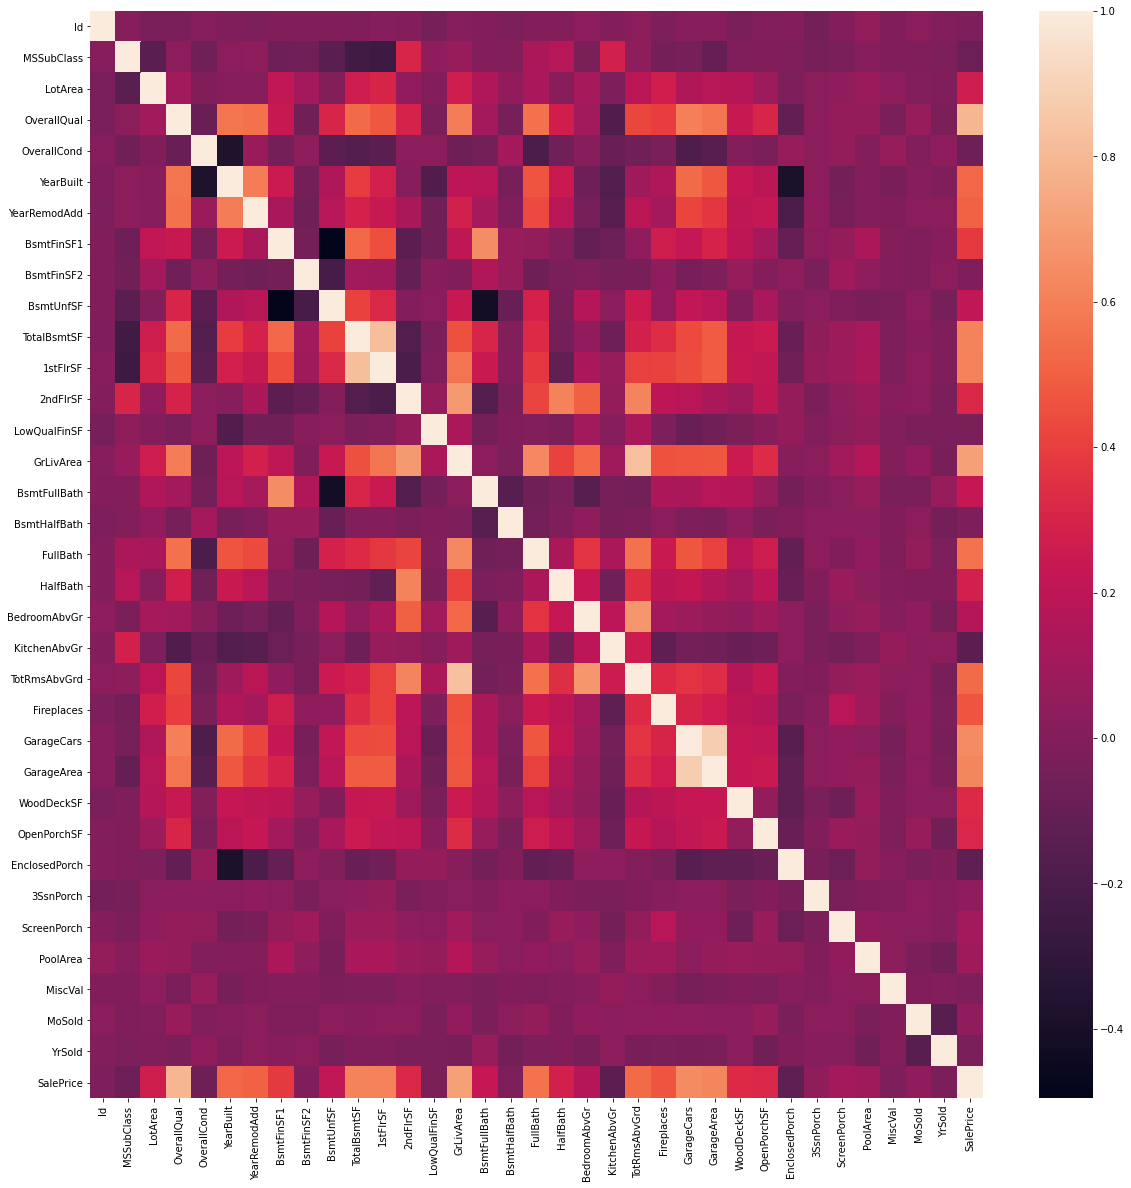

In [16]:
# Multivariate distribution(How they are correlated)
plt.figure(figsize=(20,20))
sns.heatmap(Numerics.corr(method='pearson'))#to check how much is the correlation between the attributes

- So from the above output , we can see that , a few attributes are positively correalted(Garage Cars and Garage Area,GrLivArea and TotRmsAbvGrd)

# Encoding the catagorical features
- Since in deep learning , all the input and output should be in numeric, hence if we have catagorical data , we have to encode it to nemuric before we can fit and evaluate our model
- So its either you integer encode or one hot encode , so we will stick to one hot encoding(where each label is mapped to a binary vector)
- One hot encode here because from our heat map , we can see that we only have 3 attributes related to each other , so the majority are not correlated so we do this one
- This method produces a lot of columns that slows down the learning significantly if the number of the category is very high for the feature.
- So all in all we want to change our catagorical attributes to numerics in binary form


In [17]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)# overwrite that existing dataframe

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)# so after encoding, drop that column since we will have a new one , so we dont want redundancy
    return df

- So in the above function thats where we will encode 
- pd.get_ dummies-when applied to a column of categories where we have one category per observation will produce a new column (variable) for each unique categorical value. It will place a one in the column corresponding to the categorical value present for that observation

In [18]:
#Applying our defined function
colNames=Train.columns#defining the argument, colNames in the dataset
oht=oneHotEncode(Train,colNames)#applying the function
oht.shape

(1460, 290)

- So from the above output we can see that we have 290 columns instead of the 81 we had(pd.get_ dummies did that , added the number of columns with zero and ones

In [19]:
#Confirming the encoding
print('There were {} columns before encoding features'.format(Train.shape[1]))#before encoding the features
oht=oneHotEncode(Train,colNames)
print('There are {} columns after encoding  features'.format(oht.shape[1]))#after encoding


There were 81 columns before encoding features
There are 290 columns after encoding  features


In [20]:
oht.columns# columns after encoding

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [21]:
pd.DataFrame.isna(oht)
nan_values = oht.isna()
nan_columns = nan_values.any()

columns_with_nan = oht.columns[nan_columns].tolist()
print(columns_with_nan)


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


- in the above code ,we trying to see if in the attributes we now have , do we have any attributes with NAs.
- so in this case , they might be mixed in a way , so we do have those that have mixed data type , so we drop them since we cant have them for our model

In [22]:
new=oht.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)#  dropping the features

In [23]:
#double checking to confirm
pd.DataFrame.isna(new)
nan_values = new.isna()
nan_columns = nan_values.any()

columns_with_nan = new.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [24]:
new.shape# we have a new shape with 287 columns

(1460, 287)

# Making the Deep neural Network

In [25]:
def baseline_model():
    model=Sequential()
    #input layer
    model.add(Dense(236, kernel_initializer='normal',input_dim=new.shape[1], activation='relu'))

    #hidden layers
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    #the output layer
    model.add(Dense(output_dim=1, kernel_initializer='normal'))
    #Compile the network
    model.compile(loss='mean_absolute_error',optimizer='adam', metrics=['mean_absolute_error'])
    model.summary()
    return model

- So we will have it in a function
- our model will be Sequential model (Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it. We use the 'add()' function to add layers to our model.)
- So in deep learning we have 3 layers, input, hidden and outpu layer
- #1- Input layer- this is the first layer with 236 neurons in this case(The input layer is responsible for receiving the inputs. ), having the input dimension be the number of rows of our New_data with the activation function being the relu.
 - Relu-Rectified Linear Unit (ReLU)The rectified linear activation function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero,  usually the best activation function to start with
 - kernel initializor-the neural network needs to start with some weights and then iteratively update them to better values. The term kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights 
- #2 - Hidden layer so we had 3 hidden layers- adding more neurons between the input and output(The neurons simply calculate the weighted sum of inputs and weights, add the bias and execute an activation function.). More hidden layers, slower the network.
- #3 - Output layer- the last layer that brings out the output , always one.The output layer takes in the inputs which in this case are from the hidden layers which are passed in from the layers before it, performs the calculations via its neurons and then the output is computed. No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transform.
- adam optimizer- The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.
- then our loss and metric is the mean absolute error which is good according to literature.


# Model Evaluation


In [26]:
target = new.SalePrice#making our SalePrice the target
new.drop(['SalePrice'],axis = 1 , inplace = True)#Dropping it here


So before we evaluate our network , we have to first first set our target which is in this case , its the SalePrice which is how we have set it in this case . Then what follows is we have to the drop it from our dataset since its how we will train our network

In [27]:
print(target)
print(new)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   

In [28]:
def baseline_model():
    model=Sequential()
    #input layer
    model.add(Dense(236, kernel_initializer='normal',input_dim=new.shape[1], activation='relu'))

    #hidden layers
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    #the output layer
    model.add(Dense(output_dim=1, kernel_initializer='normal'))
    #Compile the network
    model.compile(loss='mean_absolute_error',optimizer='adam', metrics=['mean_absolute_error'])
    model.summary()
    return model


In [29]:
#Evaluate model
estimator=KerasRegressor(build_fn=baseline_model, epochs=15, batch_size=5, verbose=0)#15 iterations
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,new,target, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 236)               67732     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               60672     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 260,245
Trainable params: 260,245
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)              

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 236)               67732     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               60672     
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 257       
Total params: 260,245
Trainable params: 260,245
Non-trainable params: 0
_________________________________________________________________
Baseline: -24496.75 (3559.72) MSE


# - so since its a regression problem , we use KerasRedressor as our estimator(Keras Wrapper)
- epochs- An epoch is one complete presentation of the data set to be learned to a learning machine( entire dataset passed foward and backward through the nueral network so here its 15 times)
- Batch size- toatl number of training examples present so here is 5

# Interpretation
So from our output we have a mean which is 26556.12(dont mind about the - sign , its how keras works, its for maximization instead of minimization so we tend to ignore it
- And we have our MSE which is 3904.14 which is not that bad given the mean , so that how much the deviation is from the mean , which is average prediction error.

# Trying other models


In [30]:
#Random tree Regressor
train_X, val_X, train_y, val_y = train_test_split(new, target, test_size = 0.25, random_state = 14)
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
Mean=predicted_prices.mean()

print('Random forest validation Mean = ', Mean)
print('Random forest validation MAE = ', MAE)

Random forest validation Mean =  182837.96443835617
Random forest validation MAE =  16901.059178082192


A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
So here even our mean absolute error is way more less than the Mean which is not a bad thin

In [31]:
#Using LBM regressor
from lightgbm import LGBMRegressor
LGBModel = LGBMRegressor()
LGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
LGBMpredictions = LGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , LGBMpredictions)
Mean=LGBMpredictions.mean()

print('LGBMBoost validation Mean = ',Mean)
print('LGBMBoost validation MAE = ',MAE)

LGBMBoost validation Mean =  181852.39960548416
LGBMBoost validation MAE =  15590.582136657842


Light GBM is a gradient boosting framework that uses tree based learning algorithm.
Same case but our error has increased as compared to the Random Forest****

In [32]:
#Using XGB regressor
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , XGBpredictions)
Mean=XGBpredictions.mean()

print('XGBoost validation Mean = ',Mean)
print('XGBoost validation MAE = ',MAE)

XGBoost validation Mean =  181996.53
XGBoost validation MAE =  18637.7262307363


 XGBoost is an implementation of gradient boosted decision trees designed for speed and performance
 Although our mean is still around 180000 our error keeps on changing which for thr XGB regresoor it has also changes****

Modelling the Standardized Dataset
- so because the input attriutes all vary in thier scales because they measure different quantities
- We can re-evaluate the same model using a standardized version of our data set
- use the Pipeline framework to perform the standardazation during the model evaluation process, within each fold of the cross validation fold into the training data

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [37]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=15, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, new, target, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 236)               67732     
_________________________________________________________________
dense_77 (Dense)             (None, 256)               60672     
_________________________________________________________________
dense_78 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_79 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 257       
Total params: 260,245
Trainable params: 260,245
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
Layer (type)            

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 236)               67732     
_________________________________________________________________
dense_122 (Dense)            (None, 256)               60672     
_________________________________________________________________
dense_123 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_124 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 257       
Total params: 260,245
Trainable params: 260,245
Non-trainable params: 0
_________________________________________________________________
Standardized: -20351.26 (2887.60) MSE


The code above creates a scikit-learn Pipeline that first standardizes the dataset then creates and evaluate the baseline neural network model
- we tryig to decrease our MAE 

# Tune The Neural Network Topology
- so here we optimizing some of the concerns for our model
- maybe the problem maybe the structure of network itself , including the number of layers and the number of neurons in each layer
-  Still we are improving our model

# Evaluate a Deeper Network Topology
- so here what we trying to do is to add the number of layers.
- Allowing the model to extract and recombine higher order features embedded in the data.
- But remember we can only add the number of hidden layers not the output or input layer so here we can only add hidden layers, so maybe we can add 2 and see how will be the effect.With the same number of neurons though

In [42]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(236, kernel_initializer='normal',input_dim=new.shape[1], activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(output_dim=1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [43]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=15, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, new, target, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -1298388681.49 (868932419.92) MSE


# Evaluate a Wider Network Topology
- so here we are going to create a wider network
- we evaluate the effect of keeping a shallow network architecture and nearly doubling the number of neurons in the one hidden layer.which is from 236 to 255
- we shall have another function for the wider model

In [44]:
def wider_model():
	# create model 
    model = Sequential()
    model.add(Dense(255, kernel_initializer='normal',input_dim=new.shape[1], activation='relu'))
    model.add(Dense(output_dim=1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=15, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, new, target, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))